# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint as pp

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

584

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
api_key = "cd06aca8ce819f7bc59ba9656f21699d"
base_url = "http://api.openweathermap.org/data/2.5/weather?q=" 
weather_data = []
loopnumber = 0
for city in cities:
    try:
        response = requests.get(base_url + city + "&appid=" + api_key).json()
        weather_data.append(response)
        time.sleep(6)
        loopnumber = loopnumber + 1
        print(f"city {loopnumber} is {response['name']}")
    except:
        print(f"city {city} has no data")
        time.sleep(6)


city 1 is Pangnirtung
city 2 is Rikitea
city 3 is Rapar
city 4 is Tuktoyaktuk
city 5 is Mount Gambier
city 6 is Yellowknife
city 7 is Vestmanna
city 8 is Lunglei
city 9 is Altagracia de Orituco
city 10 is Uri
city ye has no data
city 12 is Daboh
city 13 is Atuona
city 14 is Ushuaia
city 15 is Puerto Ayora
city 16 is Albany
city 17 is Bluff
city 18 is Busselton
city 19 is Coihaique
city 20 is Butaritari
city 21 is Jamestown
city 22 is Laguna
city 23 is Boueni
city nizhneyansk has no data
city 25 is Esperance
city 26 is Chapleau
city 27 is Komsomolskiy
city 28 is Torbay
city 29 is Punta Arenas
city 30 is Geraldton
city 31 is Ahipara
city 32 is Mitsamiouli
city 33 is Hithadhoo
city bengkulu has no data
city 35 is Cayenne
city 36 is Tunceli
city 37 is Cape Town
city 38 is Hofn
city 39 is Mataura
city 40 is Hermanus
city 41 is Bredasdorp
city umzimvubu has no data
city 43 is Nileshwar
city 44 is Praya
city 45 is New Norfolk
city 46 is Victoria
city mys shmidta has no data
city 48 is Norman 

city 378 is Yilan
city 379 is Mokobeng
city 380 is Rock Sound
city 381 is Wundanyi
city 382 is Staroaleyskoye
city 383 is Maceio
city 384 is Biak
city 385 is Santa Isabel do Rio Negro
city 386 is Dombarovskiy
city 387 is Arlit
city 388 is Vostok
city 389 is Erzin
city 390 is Mhlume
city 391 is Leningradskiy
city 392 is Mikhaylovka
city 393 is Mufumbwe
city 394 is Bucerias
city 395 is Auckland
city 396 is Touros
city 397 is Broome
city 398 is Hambantota
city 399 is Soyo
city 400 is Tezu
city 401 is Tarauaca
city 402 is Hwange
city 403 is Saskylakh
city 404 is Galle
city 405 is San Jose
city 406 is Grand Gaube
city 407 is Berlevag
city 408 is Haifa
city 409 is Sidhi
city 410 is Ocampo
city 411 is Araouane
city 412 is Lebu
city 413 is Zeya
city 414 is Freeport
city 415 is Ouesso
city 416 is Kampot
city 417 is Bend
city 418 is North Bend
city 419 is Cururupu
city 420 is Acari
city 421 is Sunndalsora
city 422 is Benicarlo
city hunza has no data
city 424 is Khawhai
city 425 is Alamogordo
cit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [94]:
columns = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]
city_df = pd.DataFrame(columns = columns)
city_l = []
cloud_l = []
country_l = []
date_l = []
hum_l = []
lat_l = []
lng_l = []
maxtemp_l = []
wind_l = []
i = 0
while i < len(weather_data):
   if weather_data[i]['cod'] == '404':
       weather_data.pop(i)
   else:
    city_l.append(weather_data[i]['name'])
    cloud_l.append(weather_data[i]['clouds']['all'])
    country_l.append(weather_data[i]['sys']['country'])
    date_l.append(weather_data[i]['dt'])
    hum_l.append(weather_data[i]['main']['humidity'])
    lat_l.append(weather_data[i]['coord']['lat'])
    lng_l.append(weather_data[i]['coord']['lon'])
    maxtemp_l.append(weather_data[i]['main']['temp_max'])
    wind_l.append(weather_data[i]['wind']['speed'])
    i += 1
len(weather_data)
city_df["City"] = city_l
city_df["Cloudiness"] = cloud_l
city_df["Country"] = country_l
city_df["Date"] = date_l
city_df["Humidity"] = hum_l
city_df["Lat"] = lat_l
city_df["Lng"] = lng_l
city_df["Max Temp"] = maxtemp_l
city_df["Wind Speed"] = wind_l
city_df.to_csv('city_df.csv')
weather_data

[{'coord': {'lon': -65.72, 'lat': 66.15},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04n'}],
  'base': 'stations',
  'main': {'temp': 272.691,
   'pressure': 1009.2,
   'humidity': 96,
   'temp_min': 272.691,
   'temp_max': 272.691,
   'sea_level': 1028.11,
   'grnd_level': 1009.2},
  'wind': {'speed': 3.01, 'deg': 125.503},
  'clouds': {'all': 88},
  'dt': 1537502592,
  'sys': {'message': 0.0037,
   'country': 'CA',
   'sunrise': 1537524148,
   'sunset': 1537568846},
  'id': 6096551,
  'name': 'Pangnirtung',
  'cod': 200},
 {'coord': {'lon': -134.97, 'lat': -23.12},
  'weather': [{'id': 501,
    'main': 'Rain',
    'description': 'moderate rain',
    'icon': '10n'}],
  'base': 'stations',
  'main': {'temp': 293.391,
   'pressure': 1025.49,
   'humidity': 100,
   'temp_min': 293.391,
   'temp_max': 293.391,
   'sea_level': 1025.52,
   'grnd_level': 1025.49},
  'wind': {'speed': 7.26, 'deg': 311.003},
  'rain': {'3h': 3.485},
  'cl

In [5]:
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

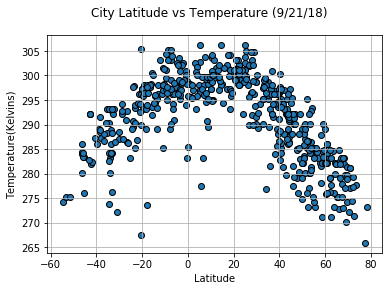

In [104]:
plt.scatter(city_df["Lat"], city_df["Max Temp"], edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Temperature(Kelvins)")
plt.grid()
plt.suptitle('City Latitude vs Temperature (9/21/18)')
plt.savefig('lattemp.png')

#### Latitude vs. Humidity Plot

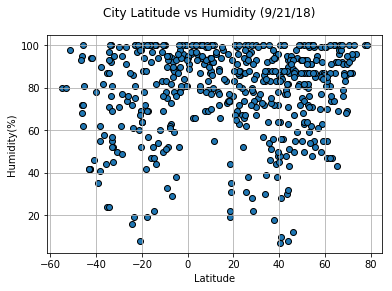

In [106]:
plt.scatter(city_df["Lat"], city_df["Humidity"], edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()
plt.suptitle('City Latitude vs Humidity (9/21/18)')
plt.savefig('lathum.png')

#### Latitude vs. Cloudiness Plot

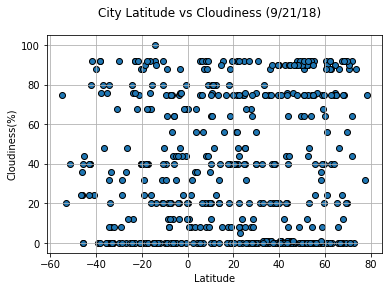

In [107]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()
plt.suptitle('City Latitude vs Cloudiness (9/21/18)')
plt.savefig('latcloud.png')

#### Latitude vs. Wind Speed Plot

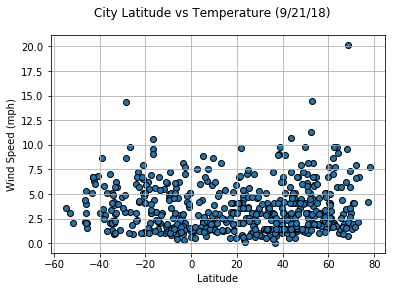

In [108]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.suptitle('City Latitude vs Temperature (9/21/18)')
plt.savefig('latwind.png')